# Zonal statistics using EarthEngine

## Directories names

In [1]:
output_dir='out'
zone_layers_dir='zone_layers'
result_layers_dir='result_layers'

## Earth Engine access

In [331]:
import ee
import geemap

#ee.Authenticate()
ee.Initialize()

## Sources

In [332]:
Map = geemap.Map()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

### Global Heterogeneity Habitat  (quantitative source)

In [ ]:
%%script false --no-raise-error
global_path = 'projects/sat-io/open-datasets/'
dataset = 'global_habitat_heterogeneity'
layers = ['coefficient_of_variation_1km', 'contrast_1km', 'correlation_1km',
          'dissimilarity_1km', 'entropy_1km', 'homogeneity_1km',
          'maximum_1km', 'mean_1km', 'pielou_1km',
          'range_1km', 'shannon_1km', 'simpson_1km',
          'standard_deviation_1km', 'uniformity_1km', 'variance_1km']
cov = ee.Image(global_path + dataset + '/' + layers[0])
contrast = ee.Image(global_path + dataset + '/' + layers[1])
corr = ee.Image(global_path + dataset + '/' + layers[2])
dissimilarity = ee.Image(global_path + dataset + '/' + layers[3])
entropy = ee.Image(global_path + dataset + '/' + layers[4])
homogeneity = ee.Image(global_path + dataset + '/' + layers[5])
maximum = ee.Image(global_path + dataset + '/' + layers[6])
mean = ee.Image(global_path + dataset + '/' + layers[7])
pielou = ee.Image(global_path + dataset + '/' + layers[8])
range = ee.Image(global_path + dataset + '/' + layers[9])
shannon = ee.Image(global_path + dataset + '/' + layers[10])
simpson = ee.Image(global_path + dataset + '/' + layers[11])
sd = ee.Image(global_path + dataset + '/' + layers[12])
uniformity = ee.Image(global_path + dataset + '/' + layers[13])
variance = ee.Image(global_path + dataset + '/' + layers[14])

image = cov.addBands([contrast, corr, dissimilarity, entropy, homogeneity, maximum,
                        mean, pielou, range, shannon, simpson, sd, uniformity, variance])
image = image.select(image.bandNames().getInfo(), layers)
# image.bandNames().getInfo()

### Global SRTM Landforms (qualitative source)

In [ ]:
%%script false --no-raise-error
dataset = ee.Image('CSP/ERGo/1_0/Global/SRTM_landforms')
landforms = dataset.select('constant')
landformsVis = {
  'min': 11.0,
  'max': 42.0,
  'palette': [
    '141414', '383838', '808080', 'EBEB8F', 'F7D311', 'AA0000', 'D89382',
    'DDC9C9', 'DCCDCE', '1C6330', '68AA63', 'B5C98E', 'E1F0E5', 'a975ba',
    '6f198c'
  ],
}
Map.setCenter(-105.58, 40.5498, 11)
Map.addLayer(landforms, landformsVis, 'Landforms')
image=landforms

### ESA WorldCover 10m v200 (qualitative source)

In [ ]:
%%script false --no-raise-error
dataset_psw = ee.ImageCollection('ESA/WorldCover/v200').first() \
.select('Map')
Map.addLayer(dataset_psw, {}, 'ESA/WorldCover/v200')
image = dataset_psw

### Copernicus Global Land Cover Layers: CGLS-LC100 Collection 3 (qualitative source)

In [ ]:
%%script false --no-raise-error
dataset = ee.Image("COPERNICUS/Landcover/100m/Proba-V-C3/Global/2019") \
.select('discrete_classification')

Map.setCenter(-71.6, 18, 7)

Map.addLayer(dataset, {}, "Land Cover")
image = dataset

### Worldclim BIO variables (quantitative source)

In [141]:
%%script false --no-raise-error
import pandas as pd
wc_bands_names = pd.read_csv('out/result_layers/worldclim_v01_name_min_max_scale_description_equivalencies.csv')
layers = wc_bands_names[['Name', 'Description']].apply(" ".join, axis=1).tolist()
dataset = ee.Image('WORLDCLIM/V1/BIO')
image = dataset.select('bio01')

def name_from_num(x):
    name = 'bio' + str(x).zfill(2)
    return(name)

for i in range(2,20):
    foo = dataset.select(name_from_num(i))
    image = image.addBands(foo)
image = image.select(image.bandNames().getInfo(), layers)
# image.getInfo()

### Geomorpho90m (quantitative variables)

In [ ]:
%%script false --no-raise-error
vrm = ee.ImageCollection("projects/sat-io/open-datasets/Geomorpho90m/vrm").median().reproject(crs='EPSG:4326', scale=90)
roughness = ee.ImageCollection("projects/sat-io/open-datasets/Geomorpho90m/roughness").median().reproject(crs='EPSG:4326', scale=90)
tpi = ee.ImageCollection("projects/sat-io/open-datasets/Geomorpho90m/tpi").median().reproject(crs='EPSG:4326', scale=90)
spi = ee.ImageCollection("projects/sat-io/open-datasets/Geomorpho90m/spi").median().reproject(crs='EPSG:4326', scale=90)
cti = ee.ImageCollection("projects/sat-io/open-datasets/Geomorpho90m/cti").median().reproject(crs='EPSG:4326', scale=90)
tri = ee.ImageCollection("projects/sat-io/open-datasets/Geomorpho90m/tri").median().reproject(crs='EPSG:4326', scale=90)
slope = ee.ImageCollection("projects/sat-io/open-datasets/Geomorpho90m/slope").median().reproject(crs='EPSG:4326', scale=90)
image = vrm.addBands([roughness, tpi, spi, cti, tri, slope])
layers = ['Vector Ruggedness Measure', 'Roughness', 'Topographic Position Index',
          'Stream Power Index', 'Compound Topographic Index', 'Terrain Ruggedness Index', 'Slope']
image = image.select(image.bandNames().getInfo(), layers)

### SRTM90 V4 elevation data

In [ ]:
%%script false --no-raise-error
dataset = ee.Image('CGIAR/SRTM90_V4')
image = dataset.select('elevation')
image.rename('Elevation')
# image.getInfo()

### Geomorphons

In [5]:
%%script false --no-raise-error
image = ee.Image("projects/ee-geofis/assets/geomorphons")
Map.setCenter(-71, 17, 7)
geomorphonsPalette = ['000000', 'dcdcdc', '380000', 'c80000', 'ff5014', 'fad23c', 'ffff3c',
    'b4e614', '3cfa96', '0000ff', '000038']
geomorphonsVis = {
  "min": 0.0,
  "max": 10.0,
  "palette": geomorphonsPalette
}
# Map.addLayer(image, geomorphonsVis, 'Geomorphons')

### CHELSA BIO variables (quantitative source)

In [123]:
%%script false --no-raise-error
import pandas as pd

global_path = 'projects/ee-geofis/assets/'
dataset = 'chelsa-bio-1981-2010-v21'
def name_from_num(x):
    name = 'CHELSA_bio' + str(x).zfill(2) + '_1981-2010_V21'
    return(name)
chelsa_bio_names = pd.read_csv(output_dir + '/' + result_layers_dir + '/' + 'chelsa_v21_bio_variables.csv')
layers = chelsa_bio_names[['shortname', 'longname']].apply(" ".join, axis=1).tolist()
image = ee.Image(global_path + dataset + '/' + name_from_num(1))
for i in range(2,20):
    foo = ee.Image(global_path + dataset + '/' + name_from_num(i))
    image = image.addBands(foo)
image = image.select(image.bandNames().getInfo(), layers)
# image.getInfo()

### Percent tree cover year 2000 (Hansen et al., 2013)

In [178]:
%%script false --no-raise-error
dataset = ee.Image('UMD/hansen/global_forest_change_2021_v1_9')
image = dataset.select('treecover2000')
treeCoverVisParam = {
  'min': 0,
  'max': 100,
  'palette': ['black', 'green']
}
# Map.addLayer(image, treeCoverVisParam, 'tree cover')

### Tree loss year (Hansen et al., 2013)

In [203]:
%%script false --no-raise-error
dataset = ee.Image('UMD/hansen/global_forest_change_2021_v1_9')
image = dataset.select('lossyear')
treeLossVisParam = {
  'min': 0,
  'max': 21,
  'palette': ['yellow', 'red']
}
# Map.addLayer(image, treeLossVisParam, 'tree loss year')

### Distance to OSM roads

In [239]:
%%script false --no-raise-error
global_path = 'projects/ee-geofis/assets'
asset = 'distance-to-osm-roads'
image = ee.Image(global_path + '/' + asset)
treeLossVisParam = {
  'min': 0,
  'max': 1500,
  'palette': ['543005', '8C510A', 'BF812D', 'DFC27D', 'F6E8C3', 'F5F5F5',
              'C7EAE5', '80CDC1', '35978F', '01665E', '003C30']
}
# Map.addLayer(image, treeLossVisParam, 'tree loss year')

### WorldPop GP 100m Constrained UN adj

In [310]:
# %%script false --no-raise-error
# dataset = ee.ImageCollection("WorldPop/GP/100m/pop") # Unconstrained
dataset = ee.ImageCollection("WorldPop/GP/100m/pop_age_sex_cons_unadj") # Constrained UNadj
image = dataset.filter(ee.Filter.inList('country', ['DOM'])).filter(ee.Filter.equals('year', 2020)).select('population').first()
# dataset_2000 = dataset.filter(ee.Filter.inList('country', ['DOM','HTI'])).filter(ee.Filter.equals('year', 2000))
# dataset_2020 = dataset.filter(ee.Filter.inList('country', ['DOM','HTI'])).filter(ee.Filter.equals('year', 2020))
# visualization = {
#   'bands': ['population'],
#   'min': 0.0,
#   'max': 50.0,
#   'palette': ['24126c', '1fff4f', 'd4ff50']
# }
# Map.setCenter(-71.643, 17.769, 7)
# Map.addLayer(dataset_2000, visualization, 'Population 2000')
# Map.addLayer(dataset_2020, visualization, 'Population 2020')
# Map.addLayer(image, visualization, 'Population 2020')

## Crear índice espacial

hex_id      13201
geometry    13201
dtype: int64

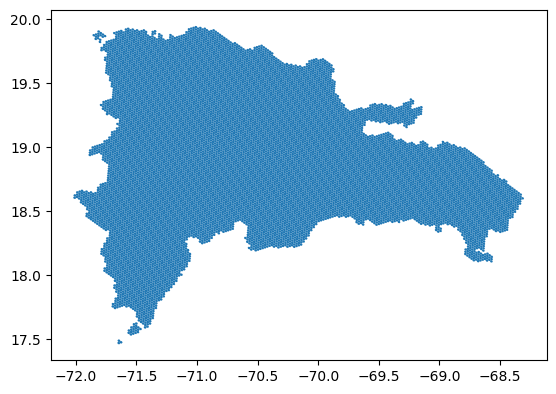

In [335]:
import geopandas as gpd
from tobler.util import h3fy

resolution = 7 #Values between 4 and 7 are OK. When using 7, split the hexgrid to use in EE in groups of less than 5001
gdf = gpd.read_file('../inst/extdata/dr.gpkg', layer='pais')
hexgrid_file_path = output_dir + '/' + zone_layers_dir + '/' + 'hexgrid_do_res_' + str(resolution) + '.gpkg'
hexgrid_do = h3fy(gdf, resolution=resolution, buffer=True)
hexgrid_do.to_file(filename=hexgrid_file_path, driver='GPKG') # This step (create->export->import) for having hex_id field as part of the GeoJSON that will be uploaded into EE in the next cells
hexgrid_do = gpd.read_file(hexgrid_file_path) # Reading the file back again
hexgrid_do.plot()
hexgrid_do.count()

## Zonal statistics

### Step 1. Convert the hexagon into Earth Engine geometry

In [328]:
import ee
import json

# hexgrid_do_geojson = hexgrid_do.to_json()
# hexgrid_do_geojson = hexgrid_do[0:5000].to_json()
# hexgrid_do_geojson = hexgrid_do[5000:10000].to_json()
hexgrid_do_geojson = hexgrid_do[10000:].to_json()
hexgrid_do_geojson
features = ee.FeatureCollection(json.loads(hexgrid_do_geojson), opt_column=id)
# features.getInfo()

### Step 2. Actually calculate the zonal statistics for each zone forming the feature collection

#### Quantitative source value layers

In [329]:
# %%script false --no-raise-error
import geopandas as gpd

# Default Reducer
# zone_stats = image.reduceRegions(collection=features, reducer=ee.Reducer.mean(), scale=image.projection().nominalScale(), tileScale=1).getInfo()

# Reducer with multiband stack with different projections
# zone_stats = image.reduceRegions(collection=features, reducer=ee.Reducer.mean(), scale=image.select(0).projection().nominalScale(), tileScale=1).getInfo()

# Reducr using SUM
zone_stats = image.reduceRegions(collection=features, reducer=ee.Reducer.sum(), scale=image.projection().nominalScale(), tileScale=1).getInfo()

#Convert to GDF
zone_stats = gpd.GeoDataFrame.from_features(zone_stats, crs='epsg:4326')
# zone_stats.fillna(0, inplace=True) #BE CAREFUL!! THIS ONLY MAKES SENSE WHEN NA MEANS ZERO
zone_stats

,geometry,hex_id,sum
0,"POLYGON ((-71.39786 19.40736, -71.40480 19.399...",874c89452ffffff,0.000000
1,"POLYGON ((-69.75711 18.69697, -69.76392 18.689...",874cd5d90ffffff,0.000000
2,"POLYGON ((-70.13997 18.96116, -70.14680 18.953...",874cd4156ffffff,83.297903
3,"POLYGON ((-71.09264 18.88026, -71.09956 18.872...",874cd6885ffffff,0.000000
4,"POLYGON ((-71.54238 19.65449, -71.54932 19.646...",874c8824affffff,52.422797
...,...,...,...
3196,"POLYGON ((-71.31543 19.89206, -71.32234 19.884...",874c89d11ffffff,0.000000
3197,"POLYGON ((-71.35039 19.91561, -71.35731 19.907...",874c89d16ffffff,0.000000
3198,"POLYGON ((-71.37114 19.89251, -71.37806 19.884...",874c89da1ffffff,0.000000
3199,"POLYGON ((-71.35202 19.89818, -71.35894 19.890...",874c89d12ffffff,0.000000


#### Qualitative source value layers (check R script+functions to deal with nested dictionaries)

In [235]:
%%script false --no-raise-error
import geopandas as gpd
zone_stats = image.reduceRegions(collection=features, reducer=ee.Reducer.frequencyHistogram(), scale=image.projection().nominalScale(), tileScale=1).getInfo()
zone_stats = gpd.GeoDataFrame.from_features(zone_stats, crs='epsg:4326')
zone_stats

,geometry,hex_id,histogram
0,"POLYGON ((-71.39786 19.40736, -71.40480 19.399...",874c89452ffffff,"{'1': 7, '10': 28.619607843137256, '11': 1, '1..."
1,"POLYGON ((-69.75711 18.69697, -69.76392 18.689...",874cd5d90ffffff,"{'10': 48.69803921568628, '12': 3, '13': 30.38..."
2,"POLYGON ((-70.13997 18.96116, -70.14680 18.953...",874cd4156ffffff,"{'1': 7, '10': 51.450980392156865, '11': 2, '1..."
3,"POLYGON ((-71.09264 18.88026, -71.09956 18.872...",874cd6885ffffff,"{'1': 118.04313725490196, '11': 23.43137254901..."
4,"POLYGON ((-71.54238 19.65449, -71.54932 19.646...",874c8824affffff,"{'10': 7, '12': 12, '14': 7, '15': 67.15686274..."
...,...,...,...
3196,"POLYGON ((-71.31543 19.89206, -71.32234 19.884...",874c89d11ffffff,{}
3197,"POLYGON ((-71.35039 19.91561, -71.35731 19.907...",874c89d16ffffff,{}
3198,"POLYGON ((-71.37114 19.89251, -71.37806 19.884...",874c89da1ffffff,{}
3199,"POLYGON ((-71.35202 19.89818, -71.35894 19.890...",874c89d12ffffff,{}


In [ ]:
%%script false --no-raise-error
import pandas as pd
zone_stats['histogram'].apply(pd.Series)

### Step 3. Save the gpd to a GeoPackage format file

In [ ]:
%%script false --no-raise-error
zone_stats.to_file(filename=output_dir + '/' + result_layers_dir + '/' + 'global_habitat_heterogeneity_res_' +
                   str(resolution) + '.gpkg', driver='GPKG', layer='zonal_stats_result')

In [ ]:
%%script false --no-raise-error
zone_stats.to_file(filename=output_dir + '/' + result_layers_dir + '/' + 'global_srtm_landforms_res_' +
                   str(resolution) + '.gpkg',
                   driver='GPKG', layer='zonal_stats_result')

In [ ]:
%%script false --no-raise-error
zone_stats.to_file(filename=output_dir + '/' + result_layers_dir + '/' + 'esa_worldcover_10m_v200_res_' +
                   str(resolution) + '.gpkg', driver='GPKG', layer='landcover')

In [ ]:
%%script false --no-raise-error
zone_stats.to_file(filename=output_dir + '/' + result_layers_dir + '/' + 'copernicus_global_landcover_100m_res_' +
                   str(resolution) + '.gpkg', driver='GPKG', layer='landcover')

In [ ]:
%%script false --no-raise-error
zone_stats.to_file(filename=output_dir + '/' + result_layers_dir + '/' + 'worldclim_v1_bio_variables_res_' +
                   str(resolution) + '.gpkg', driver='GPKG', layer='zonal_stats_result')

In [ ]:
%%script false --no-raise-error
zone_stats.to_file(filename=output_dir + '/' + result_layers_dir + '/' + 'geomorpho90m_res_' +
                   str(resolution) + '.gpkg', driver='GPKG', layer='zonal_stats_result')

In [ ]:
%%script false --no-raise-error
zone_stats.to_file(filename=output_dir + '/' + result_layers_dir + '/' + 'cgiar_elevation_srtm90v4_res_' +
                   str(resolution) + '.gpkg', driver='GPKG', layer='zonal_stats_result')

In [31]:
%%script false --no-raise-error
zone_stats.to_file(filename=output_dir + '/' + result_layers_dir + '/' + 'geomorpho90m_geomorphons_res_' +
                   str(resolution) + '.gpkg', driver='GPKG', layer='zonal_stats_result')

In [127]:
%%script false --no-raise-error
zone_stats.to_file(filename=output_dir + '/' + result_layers_dir + '/' + 'chelsa_v21_bio_variables_res_' +
                   str(resolution) + '.gpkg', driver='GPKG', layer='zonal_stats_result')

In [201]:
%%script false --no-raise-error
zone_stats.to_file(filename=output_dir + '/' + result_layers_dir + '/' + 'hansen_gfc_v19_ptc_y2000_res_' +
                   str(resolution) + '.gpkg', driver='GPKG', layer='zonal_stats_result')

In [236]:
%%script false --no-raise-error
zone_stats.to_file(filename=output_dir + '/' + result_layers_dir + '/' + 'hansen_gfc_v19_ly_res_' +
                   str(resolution) + '.gpkg', driver='GPKG', layer='zonal_stats_result')

In [263]:
%%script false --no-raise-error
zone_stats.to_file(filename=output_dir + '/' + result_layers_dir + '/' + 'distance_to_osm_roads_res_' +
                   str(resolution) + '.gpkg', driver='GPKG', layer='zonal_stats_result')

In [330]:
# %%script false --no-raise-error
zone_stats.to_file(filename=output_dir + '/' + result_layers_dir + '/' + 'worldpop_gp_constrained_unadj_2020_3_res_' +
                   str(resolution) + '.gpkg', driver='GPKG', layer='zonal_stats_result')

## Plot the result

### Static map

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(30,26))

# Define the legend axis
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the U.S. map with hexagons, where the colour represents the mean air temperature
zone_stats.plot(column='shannon_1km', ax=ax, cmap='OrRd', legend=True, cax=cax)

# Customise the legend
cax.minorticks_on()
cax.tick_params(which='major', direction='in', length=18, width=2, labelsize=24)
cax.tick_params(which='minor', direction='in', length=12, width=2, labelsize=24)
cax.set_title('Shannon, 1km', fontsize=24)

# Turn the x-axis and y-axis off
ax.set_axis_off()

### Interactive map

In [ ]:
import matplotlib
import mapclassify
import folium

int_map = zone_stats[['geometry', 'hex_id', 'shannon_1km']].explore(
    column='shannon_1km', name='Shannon, 1km', cmap='OrRd',
    style_kwds={'opacity':0.4, 'color':'black', 'opacity':0.2},
    highlight_kwds={'fillOpacity':1},
    tooltip_kwds={'aliases':['Hex ID', 'Shannon, 1km']},
    legend_kwds={'caption':'Shannon, 1km'})

# Add layer control to the map
folium.TileLayer('cartodbdark_matter',overlay=True,name="View in Dark Mode").add_to(int_map)
folium.TileLayer('cartodbpositron',overlay=True,name="View in Light Mode").add_to(int_map)
folium.LayerControl(collapsed=False).add_to(int_map)

int_map